In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
df = pd.read_csv(r"C:\Users\Kimo Store\Downloads\restaurant_sales_data.csv")
df

,Order ID,Customer ID,Category,Item,Price,Quantity,Order Total,Order Date,Payment Method
0,ORD_705844,CUST_092,Side Dishes,Side Salad,3.0,1.0,3.0,2023-12-21,Credit Card
1,ORD_338528,CUST_021,Side Dishes,Mashed Potatoes,4.0,3.0,12.0,2023-05-19,Digital Wallet
2,ORD_443849,CUST_029,Main Dishes,Grilled Chicken,15.0,4.0,60.0,2023-09-27,Credit Card
3,ORD_630508,CUST_075,Drinks,NaN,NaN,2.0,5.0,2022-08-09,Credit Card
4,ORD_648269,CUST_031,Main Dishes,Pasta Alfredo,12.0,4.0,48.0,2022-05-15,Cash
...,...,...,...,...,...,...,...,...,...
17529,ORD_320102,CUST_021,Drinks,NaN,NaN,4.0,4.0,2023-12-23,Cash
17530,ORD_974128,CUST_069,Desserts,Ice Cream,5.0,3.0,15.0,2023-12-18,Cash
17531,ORD_108324,CUST_050,Desserts,Ice Cream,5.0,4.0,20.0,2022-05-20,Digital Wallet
17532,ORD_612647,CUST_073,Side Dishes,Mashed Potatoes,4.0,2.0,8.0,2022-01-27,Digital Wallet


In [4]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

Order ID: object
Customer ID: object
Category: object
Item: object
Price: float64
Quantity: float64
Order Total: float64
Order Date: object
Payment Method: object


In [5]:
print(f"\nNumber of rows: {len(df)}")


Number of rows: 17534


In [6]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [7]:
date = 'Order Date'

print("Earliest order:", df[date].min())
print("Latest order:", df[date].max())
print("Date range:", df[date].max() - df[date].min())

Earliest order: 2022-01-01 00:00:00
Latest order: 2023-12-31 00:00:00
Date range: 729 days 00:00:00


In [8]:
missing = df.isnull().sum()
print("Missing values:")
print(missing[missing > 0])

Missing values:
Item              1758
Price              876
Quantity           430
Order Total        430
Payment Method    1082
dtype: int64


In [9]:
df = df.dropna()

In [10]:
df = df.drop_duplicates()

In [11]:
df['calculated_total'] = df['Price'] * df['Quantity']

In [12]:
mismatch = df['Order Total'] != df['calculated_total']
mismatch_count = mismatch.sum()

print(f"Mismatches found: {mismatch_count}")

Mismatches found: 0


In [13]:
numeric_cols = ['Price', 'Quantity', 'Order Total']

# Summary statistics
print("Summary statistics:")
print(df[numeric_cols].describe())

Summary statistics:
              Price      Quantity   Order Total
count  15252.000000  15252.000000  15252.000000
mean       6.596873      3.020063     19.962693
std        4.841001      1.413793     18.735734
min        1.000000      1.000000      1.000000
25%        3.000000      2.000000      8.000000
50%        5.000000      3.000000     15.000000
75%        7.000000      4.000000     25.000000
max       20.000000      5.000000    100.000000


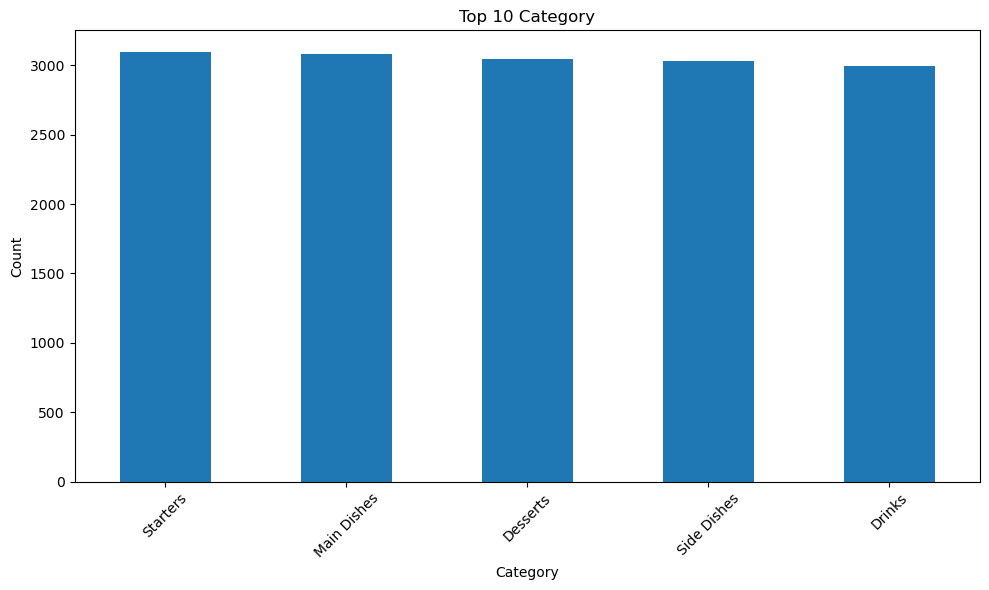

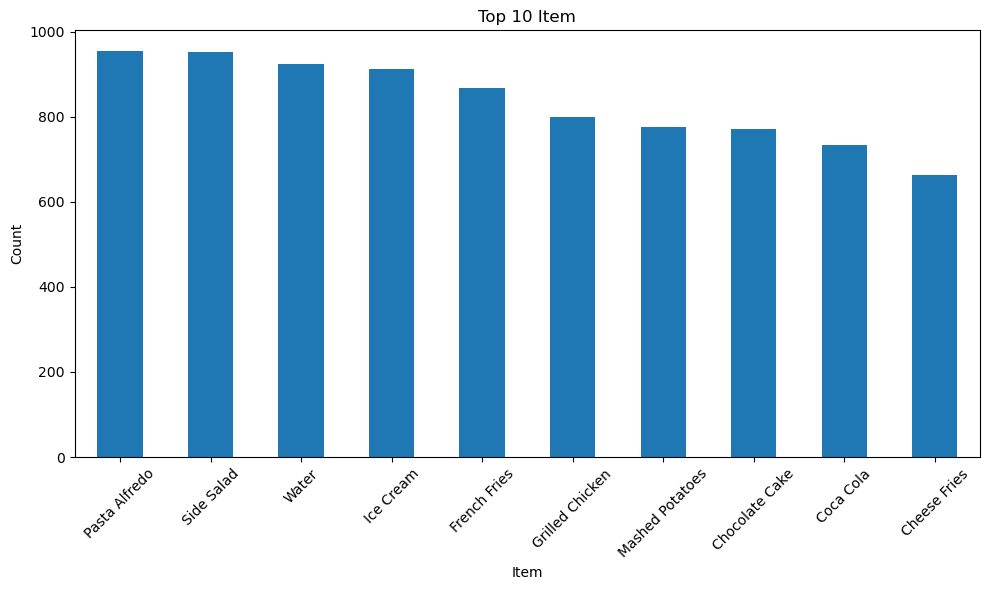

In [14]:
cat_cols = ['Category', 'Item']
for col in cat_cols:
    top_values = df[col].value_counts().head(10)
    plt.figure(figsize=(10, 6))
    top_values.plot(kind='bar')
    plt.title(f'Top 10 {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [15]:
print("Top 5 categories:")
print(df['Category'].value_counts().head(10))

# Top items
print("\nTop 5 items:")
print(df['Item'].value_counts().head(10))

Top 5 categories:
Category
Starters       3097
Main Dishes    3082
Desserts       3042
Side Dishes    3033
Drinks         2998
Name: count, dtype: int64

Top 5 items:
Item
Pasta Alfredo      955
Side Salad         953
Water              924
Ice Cream          912
French Fries       867
Grilled Chicken    799
Mashed Potatoes    775
Chocolate Cake     772
Coca Cola          733
Cheese Fries       663
Name: count, dtype: int64


In [16]:
# Calculate revenue by category
revenue_by_category = df.groupby('Category')['Order Total'].sum()

# Sort from highest to lowest
revenue_by_category = revenue_by_category.sort_values(ascending=False)

print("Revenue by Category:")
print(revenue_by_category)

# Get the top category
top_category = revenue_by_category.index[0]
top_revenue = revenue_by_category.iloc[0]
print(f"\nTOP CATEGORY: {top_category} (${top_revenue:.2f})")

Revenue by Category:
Category
Main Dishes    143142.0
Starters        54351.0
Desserts        50880.0
Side Dishes     36113.0
Drinks          19985.0
Name: Order Total, dtype: float64

TOP CATEGORY: Main Dishes ($143142.00)


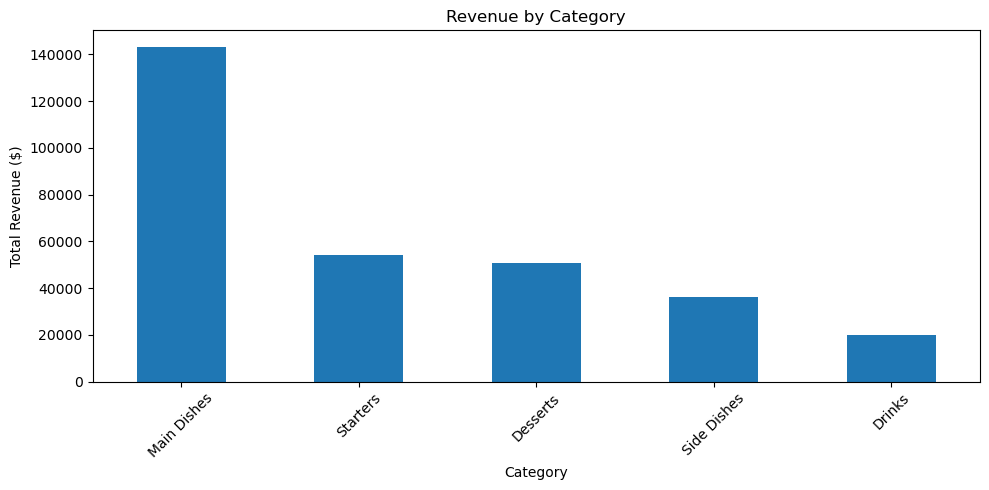

In [17]:
revenue_by_category.plot(kind='bar', figsize=(10, 5))
plt.title('Revenue by Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# 1. Most popular items by quantity sold
top_by_quantity = df.groupby('Item')['Quantity'].sum().sort_values(ascending=False)
print("TOP ITEMS BY QUANTITY SOLD:")
print(top_by_quantity.head(10))

# 2. Most profitable items by revenue
top_by_revenue = df.groupby('Item')['Order Total'].sum().sort_values(ascending=False)
print("\nTOP ITEMS BY REVENUE:")
print(top_by_revenue.head(10))

TOP ITEMS BY QUANTITY SOLD:
Item
Pasta Alfredo      2963.0
Side Salad         2865.0
Ice Cream          2855.0
Water              2799.0
French Fries       2641.0
Grilled Chicken    2414.0
Mashed Potatoes    2312.0
Chocolate Cake     2275.0
Coca Cola          2223.0
Cheese Fries       1997.0
Name: Quantity, dtype: float64

TOP ITEMS BY REVENUE:
Item
Grilled Chicken       36210.0
Pasta Alfredo         35556.0
Steak                 34560.0
Salmon                21654.0
Vegetarian Platter    15162.0
Ice Cream             14275.0
Chocolate Cake        13650.0
French Fries          10564.0
Chicken Melt          10320.0
Cheese Fries           9985.0
Name: Order Total, dtype: float64


In [19]:
#Calculate correlation
correlation = df['Price'].corr(df['Quantity'])
print(f"Correlation between Price and Quantity: {correlation:.3f}")

# 3. Interpretation
if correlation < -0.3:
    print("STRONG negative correlation: Higher prices = Lower sales")
elif correlation < -0.1:
    print("Moderate negative correlation: Higher prices tend to sell less")
elif correlation > 0.3:
    print("STRONG positive correlation: Higher prices = Higher sales!")
elif correlation > 0.1:
    print("Moderate positive correlation: Higher prices tend to sell more")
else:
    print("Very weak or no correlation: Price doesn't affect quantity much")

Correlation between Price and Quantity: 0.006
Very weak or no correlation: Price doesn't affect quantity much


ORDERS BY DAY OF WEEK:
Monday: 2205 orders
Tuesday: 2147 orders
Wednesday: 2146 orders
Thursday: 2191 orders
Friday: 2191 orders
Saturday: 2192 orders
Sunday: 2180 orders

PEAK DAY: Monday (2205 orders)


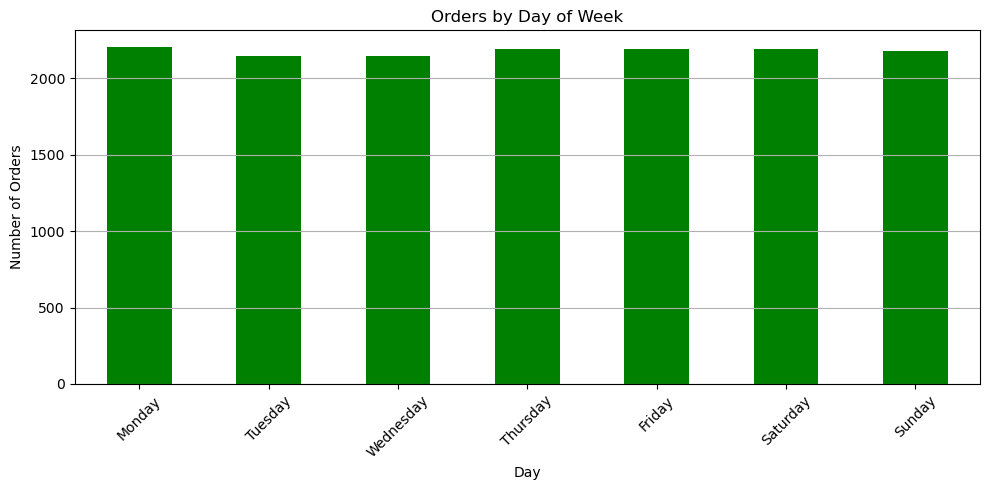

In [20]:
# 1. Extract day of week from order_date
df['day_of_week'] = df['Order Date'].dt.day_name()

# 2. Count orders by day
orders_by_day = df['day_of_week'].value_counts()

# Reorder days properly
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_by_day = orders_by_day.reindex(days_order)

print("ORDERS BY DAY OF WEEK:")
for day, count in orders_by_day.items():
    print(f"{day}: {count} orders")

# 3. Find peak day
peak_day = orders_by_day.idxmax()
peak_orders = orders_by_day.max()
print(f"\nPEAK DAY: {peak_day} ({peak_orders} orders)")

# 4. Visualize
import matplotlib.pyplot as plt

orders_by_day.plot(kind='bar', figsize=(10, 5), color='green')
plt.title('Orders by Day of Week')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [22]:
#a simple text report
print("=" * 50)
print("RESTAURANT SALES ANALYSIS REPORT")
print("=" * 50)
print(f"Analysis Period: {df['Order Date'].min().date()} to {df['Order Date'].max().date()}")
print(f"Total Records: {len(df):,}")
print(f"Total Sales: ${df['Order Total'].sum():,.2f}")
print(f"Average Order Value: ${df['Order Total'].mean():.2f}")
print(f"Average Item Price: ${df['Price'].mean():.2f}")
print(f"Most Common Category: {df['Category'].value_counts().index[0]}")
print(f"Most Common Payment Method: {df['Payment Method'].value_counts().index[0]}")
print("=" * 50)

RESTAURANT SALES ANALYSIS REPORT
Analysis Period: 2022-01-01 to 2023-12-31
Total Records: 15,252
Total Sales: $304,471.00
Average Order Value: $19.96
Average Item Price: $6.60
Most Common Category: Starters
Most Common Payment Method: Credit Card
